<center> <h1> Self Case Study 2 </h1>

<center><h1> Understanding Clouds from Satellite Images </h1>

<h3> Kaggle Competition Link: </h3>

<h4> https://www.kaggle.com/c/understanding_cloud_organization/overview/description </h4>

## Overview

Climate change has been at the top of our minds and on the forefront of important political decision-making for many years. We hope you can use this competition’s dataset to help demystify an important climatic variable. Scientists, like those at Max Planck Institute for Meteorology, are leading the charge with new research on the world’s ever-changing atmosphere and they need your help to better understand the clouds.

Shallow clouds play a huge role in determining the Earth's climate. They’re also difficult to understand and to represent in climate models. By classifying different types of cloud organization, researchers at Max Planck hope to improve our physical understanding of these clouds, which in turn will help us build better climate models.

There are many ways in which clouds can organize, but the boundaries between different forms of organization are murky. This makes it challenging to build traditional rule-based algorithms to separate cloud features. The human eye, however, is really good at detecting features—such as clouds that resemble flowers.

In this challenge, you will build a model to classify cloud organization patterns from satellite images. If successful, you’ll help scientists to better understand how clouds will shape our future climate. This research will guide the development of next-generation models which could reduce uncertainties in climate projections.

## Evaluation Metric 

This competition is evaluated on the mean Dice coefficient. The Dice coefficient can be used to compare the pixel-wise agreement between a predicted segmentation and its corresponding ground truth. The formula is given by:

\begin{equation}
Dice  Coefficient = \frac{2 ∗ |X \cap Y|} {|X|+|Y|}
\end{equation}

where X is the predicted set of pixels and Y is the ground truth. The Dice coefficient is defined to be 1 when both X and Y are empty. The leaderboard score is the mean of the Dice coefficients for each <Image, Label> pair in the test set.

In [0]:
### Mounting drive with colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Loading data from Kaggle 

In [2]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-IN,en-GB;q=0.9,en-US;q=0.8,en;q=0.7" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/13333/620218/all.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1575629709&Signature=DX5wdtz69%2BN6Qd17Q5uC7zuEDA1jy6KgcUomvh%2Be%2B0DXAgL1qSaz4qcbiwVrBlvEBAXA7VYBbDccDGunn62%2Fzzjw7Q28Ya70oQT%2BCxc08AWk7HBiWiD6USPPxAIyW4%2FLWtFixMfYIB2b3P21eAEdIAFWDtRHyZqrOUs02V76R3ba8Wx4%2BgcyLq6AK2jquVkauEqAtVIUfqUDhPsWavRydqQ4BwE6grxjmnTUUF16ygOcNnjc6d1zHkoX6tEHr5m54E8ctB9rkR1%2BSsYU1AzXe85L770n6EDAjbCzWQBLSHMqopmb3ZQooQm4x5nMZH7Cu8%2Fe96XV0r%2B5N1QOgJdnYw%3D%3D&response-content-disposition=attachment%3B+filename%3Dunderstanding_cloud_organization.zip" -O "understanding_cloud_organization.zip" -c

--2019-12-05 05:50:05--  https://storage.googleapis.com/kaggle-competitions-data/kaggle/13333/620218/all.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1575629709&Signature=DX5wdtz69%2BN6Qd17Q5uC7zuEDA1jy6KgcUomvh%2Be%2B0DXAgL1qSaz4qcbiwVrBlvEBAXA7VYBbDccDGunn62%2Fzzjw7Q28Ya70oQT%2BCxc08AWk7HBiWiD6USPPxAIyW4%2FLWtFixMfYIB2b3P21eAEdIAFWDtRHyZqrOUs02V76R3ba8Wx4%2BgcyLq6AK2jquVkauEqAtVIUfqUDhPsWavRydqQ4BwE6grxjmnTUUF16ygOcNnjc6d1zHkoX6tEHr5m54E8ctB9rkR1%2BSsYU1AzXe85L770n6EDAjbCzWQBLSHMqopmb3ZQooQm4x5nMZH7Cu8%2Fe96XV0r%2B5N1QOgJdnYw%3D%3D&response-content-disposition=attachment%3B+filename%3Dunderstanding_cloud_organization.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6226530892 (5.8G) [application/zip]
Saving to: ‘understanding_cloud_organization.zip’

un

### Installing patool and pyunpack

##### patool and pyunpack is used to extract data of zip files.

In [3]:
!pip install patool
!pip install pyunpack

     |████████████████████████████████| 81kB 4.3MB/s 
  Created wheel for pyunpack: filename=pyunpack-0.1.2-cp36-none-any.whl size=5162 sha256=f796b874d6dc19997fffc4870bce9676847f8e9e4c876711e07cfb196afb7b89
  Stored in directory: /root/.cache/pip/wheels/af/44/08/60613970881e542c0baad1f2dea5ed8e6716bc573f49197b7e
Successfully built pyunpack


### Extracting zip files

In [0]:
from pyunpack import Archive

Archive('understanding_cloud_organization.zip').extractall('/content/')

### Extracting each zip file

In [0]:
import os

if not os.path.isfile('train_images'):
    os.mkdir('train_images')
    Archive('train_images.zip').extractall('/content/train_images/')

if not os.path.isfile('test_images'):
    os.mkdir('test_images')
    Archive('test_images.zip').extractall('/content/test_images/')

### Extracting names of train_images and test_images in a list

In [0]:
# train_images in list
tr_img_lis = os.listdir('train_images')

# test_images in list
te_img_lis = os.listdir('test_images')

In [7]:
print("\n -> Number of train images:", len(tr_img_lis), '\n')
print(" -> Number of test images:", len(te_img_lis), '\n')
print(" -> Type of image:", tr_img_lis[0].split('.')[1], '\n')


 -> Number of train images: 5546 

 -> Number of test images: 3698 

 -> Type of image: jpg 



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## Displaying first 10 train images


First 10 train images
********************** 



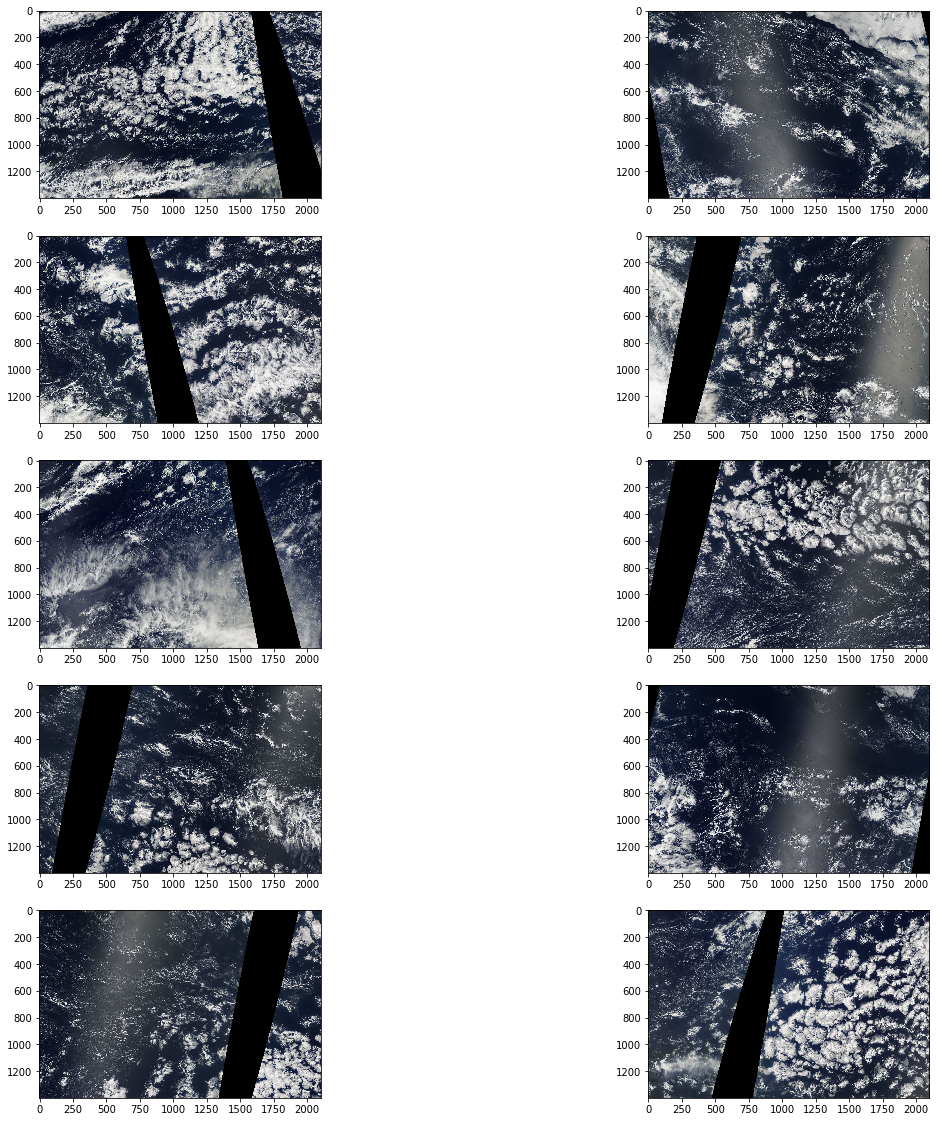

In [10]:
import cv2

print("\nFirst 10 train images")
print('*'*22, '\n')

fig = plt.figure(figsize = (20,20))

for i in range(1, 11):

    fig.add_subplot(5, 2, i)

    tr_read = cv2.imread('train_images/'+tr_img_lis[i])
    tr_cvt = cv2.cvtColor(tr_read, cv2.COLOR_BGR2RGB)
    plt.imshow(tr_cvt)

plt.show()

In [0]:
# Observation

In [0]:
## Displaying test images


First 10 test images
********************** 



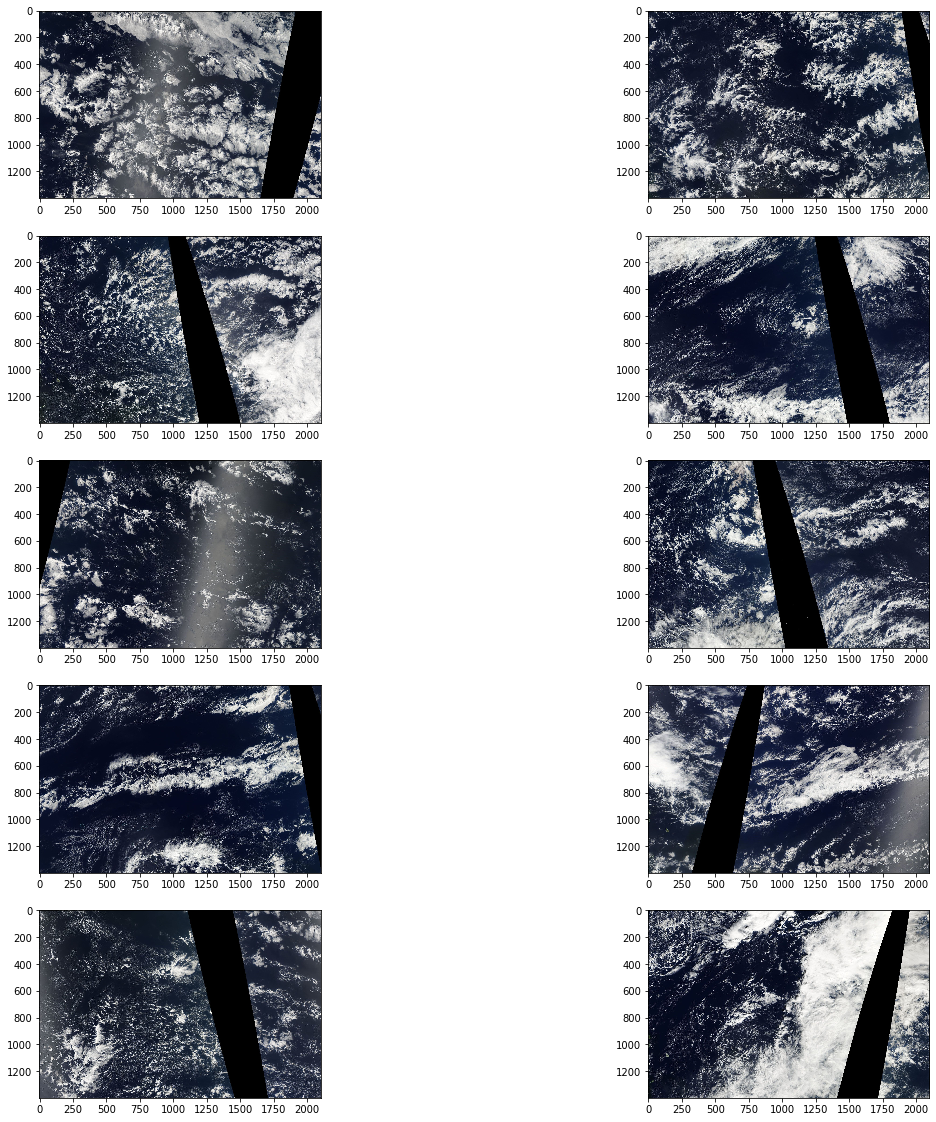

In [13]:
import cv2

print("\nFirst 10 test images")
print('*'*22, '\n')

fig = plt.figure(figsize = (20,20))

for i in range(1, 11):

    fig.add_subplot(5, 2, i)

    te_read = cv2.imread('test_images/'+te_img_lis[i])
    te_cvt = cv2.cvtColor(te_read, cv2.COLOR_BGR2RGB)
    plt.imshow(te_cvt)

plt.show()

In [0]:
### Importin train csv file

In [15]:
df = pd.read_csv('train.csv')

print("\n -> Shape of dataframe:", df.shape, '\n')
print(" -> Number of rows:", df.shape[0], '\n')
print(" -> Number of columns:", df.shape[1], '\n')


 -> Shape of dataframe: (22184, 2) 

 -> Number of rows: 22184 

 -> Number of columns: 2 



In [16]:
print("\n 10 Head of dataframe")
print('*'*22, '\n')

df.head(10)


 10 Head of dataframe
********************** 



,Image_Label,EncodedPixels
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...
2,0011165.jpg_Gravel,NaN
3,0011165.jpg_Sugar,NaN
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...
5,002be4f.jpg_Flower,1339279 519 1340679 519 1342079 519 1343479 51...
6,002be4f.jpg_Gravel,NaN
7,002be4f.jpg_Sugar,67495 350 68895 350 70295 350 71695 350 73095 ...
8,0031ae9.jpg_Fish,3510 690 4910 690 6310 690 7710 690 9110 690 1...
9,0031ae9.jpg_Flower,2047 703 3447 703 4847 703 6247 703 7647 703 9...


##### We will make a deep copy of dataframe

In [18]:
import copy

df_c = copy.deepcopy(df)

df_c.head(2)

,Image_Label,EncodedPixels
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...


### Separating image id and image class and storing in 2 new columns

In [0]:
# Image id
df_c['Id'] = df_c['Image_Label'].apply(lambda x: x.split('.')[0])

# Image class
df_c['Label'] = df_c['Image_Label'].apply(lambda x: x.split('_')[1])

In [21]:
df_c.head()

,Image_Label,EncodedPixels,Id,Label
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...,0011165,Fish
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...,0011165,Flower
2,0011165.jpg_Gravel,NaN,0011165,Gravel
3,0011165.jpg_Sugar,NaN,0011165,Sugar
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...,002be4f,Fish


In [0]:
### Check for null values

In [23]:
null = df_c[df_c['EncodedPixels'].isnull() == True].shape[0]

print("\n -> Number of datapoints:", df_c.shape[0], '\n')
print(" -> Number of null values:", null, '\n')
print(" -> Percentage of null values: {}%".format(np.round((null/df_c.shape[0]) * 100, 3)))


 -> Number of datapoints: 22184 

 -> Number of null values: 10348 

 -> Percentage of null values: 46.646%


### Graphical visualization


 -> Graphical visualization of null values.
******************************************* 



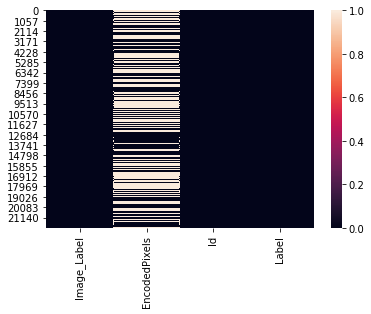

In [25]:
print("\n -> Graphical visualization of null values.")
print('*'*43, '\n')

sns.heatmap(df_c.isnull())

plt.show()

### Count of each label class

In [26]:
df_c[df_c['EncodedPixels'].isnull() == True]['Label'].value_counts()

Flower    3181
Fish      2765
Gravel    2607
Sugar     1795
Name: Label, dtype: int64

### Bar plot for count of each label class


 -> Value count for label data.
******************************** 

Flower    3181
Fish      2765
Gravel    2607
Sugar     1795
Name: Label, dtype: int64

 ------------------------------------------------------------ 


 -> Count plot for label.
************************* 



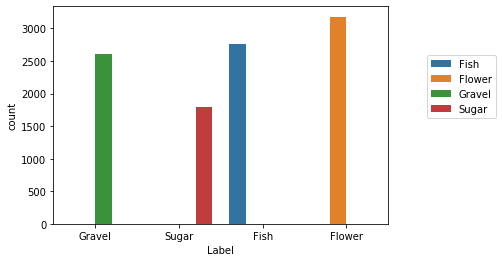

In [27]:
print("\n -> Value count for label data.")
print('*'*32, '\n')
print(df_c[df_c['EncodedPixels'].isnull() == True]['Label'].value_counts())

print('\n','-'*60, '\n')

print("\n -> Count plot for label.")
print('*'*25, '\n')

sns.countplot(df_c[df_c['EncodedPixels'].isnull() == True]['Label'], hue = df_c['Label'], saturation = 0.75 )
plt.legend(loc = 2, bbox_to_anchor=(1.1, 0.8))
plt.show()

### Observation:

 - Flower type clouds have more in number while Sugar type clouds are less in number.
 - There are precisely 3181 flower type clouds and more among other type clouds.
 - There are precisely 1795 sugar type clouds and is lesser among other type clouds.

### Pie chart for count of label class


 -> Pie chart for label.
************************* 



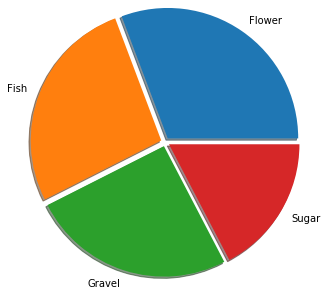

In [28]:
print("\n -> Pie chart for label.")
print('*'*25, '\n')

vc = df_c[df_c['EncodedPixels'].isnull() == True]['Label'].value_counts()
label_count = [vc[0], vc[1], vc[2], vc[3]] 
label_names = ['Flower', 'Fish', 'Gravel', 'Sugar']
explode = [0.05, 0.05, 0.05, 0.05]

#plt.figure(figsize = (6,6))
plt.pie(x = label_count, labels = label_names, explode = explode, shadow = True, radius = 1.5)
plt.show()

### Observation:

 - We can see blue color pie (Flower type cloud) is bigger over other pies. This shows flower type clouds are more in number.
 - We can also see that red color pie (Sugar type cloud) is smaller over other pies. This shows sugar type clouds are less in number.

# Model Preparation

### Importing train and submission csv files

In [0]:
# Train data
train = pd.read_csv('train.csv')

# Submission data
submission = pd.read_csv('sample_submission.csv')

### Extracting class ids and label

In [0]:
# Preprocecss train data
# Creating 2 columns 1 for image id and label
train['image'] = train['Image_Label'].apply(lambda x: x.split('_')[0])
train['label'] = train['Image_Label'].apply(lambda x: x.split('_')[1])

In [0]:
# Creating a test dataframe which contains unique ids from submission file.
submission['image'] = submission['Image_Label'].apply(lambda x: x.split('_')[0])
test = pd.DataFrame(submission['image'].unique(), columns=['image'])

### Creating columns for each masks

In [0]:
# Create masks columns
train_df = pd.pivot_table(train, index = ['image'], values = ['EncodedPixels'], columns = ['label'], aggfunc = np.min)

# Resetting index
train_df = train_df.reset_index()

# Creating mask respective columns
train_df.columns = ['image', 'Fish_mask', 'Flower_mask', 'Gravel_mask', 'Sugar_mask']

### Splitting into train and validation

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_cv = train_test_split(train_df, test_size = 0.2, random_state = 0)

print("Train samples:", x_train.shape[0])
print("CV samples:", x_cv.shape[0])
print("Test samples:", test.shape[0])

Train samples: 4436
CV samples: 1110
Test samples: 3698


### Creating columns with unique value

In [34]:
x_train['col'] = 'train'
x_cv['col'] = 'cv'
test['col'] = 'test'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Image preprocessing

In [0]:
backbone = 'resnet34'
batch_size = 32
learning_rate = 3e-4
height = 256
width = 384
channels = 3
n_class = 4
preprocessing = None
model_path = 'uNet_%s_%sx%s.h5' % (backbone, height, width)

### Function to preprocess image

 - Source: https://www.kaggle.com/dimitreoliveira/cloud-images-segmentation-utillity-script

In [0]:
def preprocess_image(image_id, load_path, save_path, height, width):
    image = cv2.imread(load_path + image_id)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (width, height))
    cv2.imwrite(save_path + image_id, image)

 - Source: https://www.kaggle.com/dimitreoliveira/cloud-images-segmentation-utillity-script

In [0]:
def pre_process_set(df, preprocess_fn):
    n_cpu = mp.cpu_count()
    df_n_cnt = df.shape[0]//n_cpu
    pool = mp.Pool(n_cpu)
    
    dfs = [df.iloc[df_n_cnt*i:df_n_cnt*(i+1)] for i in range(n_cpu)]
    dfs[-1] = df.iloc[df_n_cnt*(n_cpu-1):]
    res = pool.map(preprocess_fn, [x_df for x_df in dfs])
    pool.close()

### Function to preprocess images and store in specified directories

- Source: https://www.kaggle.com/dimitreoliveira/cloud-images-segmentation-utillity-script

In [0]:
def preprocess_data(df, height = height, width = width):

    df = df.reset_index()

    for i in range(df.shape[0]):
        item = df.iloc[i]
        image_id = item['image']
        item_set = item['col']

        if item_set == 'train':
            preprocess_image(image_id, train_load_path, train_dest_path, height, width)

        if item_set == 'cv':
            preprocess_image(image_id, train_load_path, cv_dest_path, height, width)

        if item_set == 'test':
            preprocess_image(image_id, test_load_path, test_dest_path, height, width)

## Defining paths and creating directories

In [0]:
# Images are loaded from this path
train_load_path = 'train_images/'
test_load_path = 'test_images/'

# Images are saved to below path
train_dest_path = 'train_img/'
cv_dest_path = 'cv_img/'
test_dest_path = 'test_img/'

In [0]:
import os
import shutil
import multiprocessing as mp

# Directories are are deleted if exists

# Train path
if os.path.exists(train_dest_path):
    shutil.rmtree(train_dest_path)

# CV path
if os.path.exists(cv_dest_path):
    shutil.rmtree(cv_dest_path)

# Test path
if os.path.exists(test_dest_path):
    shutil.rmtree(test_dest_path)
    
# New directories are created where images are saved
os.makedirs(train_dest_path)
os.makedirs(cv_dest_path)
os.makedirs(test_dest_path)

### Calling pre_process_set function

In [0]:
# Train data
pre_process_set(x_train, preprocess_data)

# CV data
pre_process_set(x_cv, preprocess_data)

# Test data
pre_process_set(test, preprocess_data)

In [42]:
import math
import random
from tensorflow import set_random_seed
from keras import backend as K
from keras.utils import Sequence
from keras.losses import binary_crossentropy

Using TensorFlow backend.


### Function for customized DataGenerator

 - Source: https://www.kaggle.com/dimitreoliveira/cloud-images-segmentation-utillity-script

In [0]:
# Data generator
class DataGenerator(Sequence):
    def __init__(self, dataframe, directory, batch_size, n_channels, target_size,  n_classes, 
                 mode='fit', target_df=None, shuffle=True, preprocessing=None, augmentation=None, seed=0):
        
        self.batch_size = batch_size
        self.dataframe = dataframe
        self.mode = mode
        self.directory = directory
        self.target_df = target_df
        self.target_size = target_size
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.augmentation = augmentation
        self.preprocessing = preprocessing
        self.seed = seed
        self.mask_shape = (1400, 2100)
        self.list_IDs = self.dataframe.index
        
        if self.seed is not None:
            np.random.seed(self.seed)
        
        self.on_epoch_end()

    def __len__(self):
        return len(self.list_IDs) // self.batch_size

    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        list_IDs_batch = [self.list_IDs[k] for k in indexes]
        X = self.__generate_X(list_IDs_batch)
        
        if self.mode == 'fit':
            Y = self.__generate_Y(list_IDs_batch)
            
            if self.augmentation:
                X, Y = self.__augment_batch(X, Y)
            
            return X, Y
        
        elif self.mode == 'predict':
            return X
        
    def on_epoch_end(self):
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)
    
    def __generate_X(self, list_IDs_batch):
        X = np.empty((self.batch_size, *self.target_size, self.n_channels))
        
        for i, ID in enumerate(list_IDs_batch):
            img_name = self.dataframe['image'].loc[ID]
            img_path = self.directory + img_name
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            if self.preprocessing:
                img = self.preprocessing(img)
                
            X[i,] = img

        return X
    
    def __generate_Y(self, list_IDs_batch):
        Y = np.empty((self.batch_size, *self.target_size, self.n_classes), dtype=int)
        
        for i, ID in enumerate(list_IDs_batch):
            img_name = self.dataframe['image'].loc[ID]
            image_df = self.target_df[self.target_df['image'] == img_name]
            rles = image_df['EncodedPixels'].values
            masks = build_masks(rles, input_shape=self.mask_shape, reshape=self.target_size)
            Y[i, ] = masks

        return Y
    
    def __augment_batch(self, X_batch, Y_batch):
        for i in range(X_batch.shape[0]):
            X_batch[i, ], Y_batch[i, ] = self.__random_transform(X_batch[i, ], Y_batch[i, ])
        
        return X_batch, Y_batch
    
    def __random_transform(self, X, Y):
        composed = self.augmentation(image=X, mask=Y)
        X_aug = composed['image']
        Y_aug = composed['mask']
        
        return X_aug, Y_aug

### Segmentation Model

 - Segmentation model is a python library from keras which is used for image segmentation.
 - Sources:
    - https://pypi.org/project/segmentation-models/
    - https://segmentation-models.readthedocs.io/en/latest/tutorial.html

In [44]:
!pip install segmentation-models

In [45]:
import segmentation_models as sm

pre_processing = sm.get_preprocessing(backbone)

Segmentation Models: using `keras` framework.


In [0]:
import albumentations as albu

augmentation = albu.Compose([albu.HorizontalFlip(p = 0.5),
                             albu.VerticalFlip(p = 0.5),
                             albu.ShiftScaleRotate(rotate_limit = 30, shift_limit = 0.1, p = 0.5)])

In [0]:
seed = 0

## Calling DataGenerator for generating train data

In [0]:
train_generator = DataGenerator(
                  directory = train_dest_path,
                  dataframe = x_train,
                  target_df = train,
                  batch_size = batch_size,
                  target_size = (height, width),
                  n_channels = channels,
                  n_classes = n_class,
                  preprocessing = preprocessing,
                  augmentation = augmentation,
                  seed = seed)

## Calling DataGenerator for generating cv data

In [0]:
cv_generator = DataGenerator(
                  directory = cv_dest_path,
                  dataframe = x_cv,
                  target_df = train,
                  batch_size = batch_size, 
                  target_size = (height, width),
                  n_channels = channels,
                  n_classes = n_class,
                  preprocessing = preprocessing,
                  seed = seed)

# Model Preparation

## Creating Checkpoint, EarlyStopping and RLR Prop

In [0]:
import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Saves the model after every epoch
checkpoint = ModelCheckpoint(model_path, monitor = 'val_loss', mode = 'min', save_best_only = True, save_weights_only = True)

# Stops training when a monitored quantity has stopped improving.
earlystop = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 5, restore_best_weights = True, verbose=1)

# RLR Prop
rlrprop = ReduceLROnPlateau(monitor = 'val_loss', mode = 'min', patience = 3, factor = 0.5, min_lr = 1e-6, verbose = 1)

# Creating Callback
callback = [checkpoint, earlystop, rlrprop]

## Using Unet architecture

In [0]:
import warnings
warnings.filterwarnings('ignore')

model = sm.Unet(backbone_name = backbone, 
                encoder_weights = 'imagenet',
                classes = n_class,
                activation = 'sigmoid',
                input_shape = (height, width, channels))

### Optimizer: Rectified Adam

 - Source: https://pypi.org/project/keras-rectified-adam/

In [53]:
!pip install keras-rectified-adam

  Created wheel for keras-rectified-adam: filename=keras_rectified_adam-0.17.0-cp36-none-any.whl size=14781 sha256=01b7ad85c310f4440fa346bd4adbb9645b6f4d684c4bfe5b62191a82b5235e7b
  Stored in directory: /root/.cache/pip/wheels/7b/01/27/3a934e1a5644f5b93c720422a6ef97034ea78a21ba71cfb549
Successfully built keras-rectified-adam


In [0]:
from keras_radam import RAdam

# Creating RAdam optimizer
optimizer = RAdam(learning_rate = 3e-4, warmup_proportion = 0.1)

### Metric: Dice Co-efficient
### Function for dice co-efficient

\begin{equation}
Dice  Coefficient = \frac{2 * |X\cap Y|}{|X|+ |Y|} 
\end{equation}

In [0]:
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

### Model compiling and model summary

In [57]:
# Compiling model
model.compile(optimizer = optimizer, loss = "binary_crossentropy", metrics = [dice_coef])

# Displaying summary
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 256, 384, 3)  0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 256, 384, 3)  9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_35 (ZeroPadding2 (None, 262, 390, 3)  0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 128, 192, 64) 9408        zero_padding2d_35[0][0]          
____________________________________________________________________________________________

### Function to convert RLE to Mask

 - Source: https://www.kaggle.com/dimitreoliveira/cloud-images-segmentation-utillity-script

In [0]:
def rle2mask(rle, imgshape):
    
    width = imgshape[0]
    height= imgshape[1]
    
    mask = np.zeros(width * height)
    
    list_rle = np.array([int(x) for x in rle.split(' ')])
    r1 = list_rle[0::2]
    r2 = list_rle[1::2]

    initial = 0
    
    for ind, i in enumerate(r1):
        mask[int(i) : int(i + r2[ind])] = 1
        initial += r2[ind]
    
    return np.transpose( mask.reshape(height, width))

### Function to convert Mask to RLE

 - Source: https://www.kaggle.com/dimitreoliveira/cloud-images-segmentation-utillity-script

In [0]:
def mask2rle(img):
    
    pixels= img.T.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

### Function to build masks

 - Source: https://www.kaggle.com/dimitreoliveira/cloud-images-segmentation-utillity-script

In [0]:
def build_masks(rles, input_shape, reshape = None):

    height, width = input_shape
    depth = len(rles)

    if reshape is None:
        masks = np.zeros((*input_shape, depth))
    else:
        masks = np.zeros((*reshape, depth))
    
    for i, rle in enumerate(rles):
        if type(rle) is str:
            if reshape is None:
                masks[:, :, i] = rle2mask(rle, input_shape)
            else:
                height, width = reshape
                mask = rle2mask(rle, input_shape)
                reshaped_mask = cv2.resize(mask, (width, height))
                masks[:, :, i] = reshaped_mask
    
    return masks

## Model fitting with fit_generator

 - Train data: train_generator
 - Validation data: cv_generator
 - Epochs : 30
 - Callbacks: [Checkpoint, EarlyStopping, RLRPro]

In [62]:
tr_step_size = len(x_train)//batch_size
cv_step_size = len(x_cv)//batch_size

history = model.fit_generator(generator = train_generator,
                              steps_per_epoch = tr_step_size,
                              validation_data = cv_generator,
                              validation_steps = tr_step_size,
                              epochs = 20,
                              verbose = 1,
                              callbacks = callback)

Epoch 1/20
138/138 [==============================] - 634s 5s/step - loss: 0.5875 - dice_coef: 0.2630 - val_loss: 0.4700 - val_dice_coef: 0.3179
Epoch 2/20
138/138 [==============================] - 493s 4s/step - loss: 0.4106 - dice_coef: 0.3135 - val_loss: 0.3751 - val_dice_coef: 0.3479
Epoch 3/20
138/138 [==============================] - 487s 4s/step - loss: 0.3384 - dice_coef: 0.3516 - val_loss: 0.3308 - val_dice_coef: 0.3835
Epoch 4/20
138/138 [==============================] - 445s 3s/step - loss: 0.3065 - dice_coef: 0.3817 - val_loss: 0.3060 - val_dice_coef: 0.4081
Epoch 5/20
138/138 [==============================] - 464s 3s/step - loss: 0.2903 - dice_coef: 0.4061 - val_loss: 0.3038 - val_dice_coef: 0.4296
Epoch 6/20
138/138 [==============================] - 468s 3s/step - loss: 0.2800 - dice_coef: 0.4255 - val_loss: 0.3021 - val_dice_coef: 0.4305
Epoch 7/20
138/138 [==============================] - 453s 3s/step - loss: 0.2760 - dice_coef: 0.4371 - val_loss: 0.2868 - val_dic

## Saving model

 - Source: https://machinelearningmastery.com/save-load-keras-deep-learning-models/#:~:targetText=Keras%20provides%20the%20ability%20to,model%20from%20the%20JSON%20specification.

In [63]:
# Saving model to JSON

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Saving weights to HDF5
model.save_weights("model_5_12_50.h5")
print("Saved model to disk.")


Saved model to disk.


In [0]:
"""
# Saving model to JSON

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Saving weights to HDF5
model.save_weights("drive/My Drive/Self Case Study - 2/Clouds from Satellite/model_1.h5")
print("Saved model to disk.")
"""


'\n# Saving model to JSON\n\nmodel_json = model.to_json()\nwith open("model.json", "w") as json_file:\n    json_file.write(model_json)\n\n# Saving weights to HDF5\nmodel.save_weights("drive/My Drive/Self Case Study - 2/Clouds from Satellite/model_1.h5")\nprint("Saved model to disk.")\n'

## Loading Model

 - Source: https://machinelearningmastery.com/save-load-keras-deep-learning-models/#:~:targetText=Keras%20provides%20the%20ability%20to,model%20from%20the%20JSON%20specification.

In [57]:
from keras.models import model_from_json

# Loading json and create model
json_file = open('/content/drive/My Drive/Self Case Study - 2/Clouds from Satellite/Model_3_12/model_3_12.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)

# Loading weights into new model
loaded_model.load_weights("/content/drive/My Drive/Self Case Study - 2/Clouds from Satellite/Model_3_12/model_3_12.h5")
print("Loaded model from disk.")

Loaded model from disk.


In [60]:
"""
# Loading weights into new model

from keras.models import load_model

model = load_model("drive/My Drive/Self Case Study - 2/Clouds from Satellite/model.h5")
print("Loaded model from disk.")
"""

'\n# Loading weights into new model\n\nfrom keras.models import load_model\n\nmodel = load_model("drive/My Drive/Self Case Study - 2/Clouds from Satellite/model.h5")\nprint("Loaded model from disk.")\n'

## Function 'plots' returns:

 - Graph for train loss and validation loss.
 - Train dice co-efficient and validation dice co-efficient.
 - Best train loss and validation loss.
 - Best train dice co-efficient and validation dice co-efficient

In [0]:
def plots(t):

    fig, ax = plt.subplots(1,1)

    if t == 'loss':

        # Loss
        tr = history.history['loss']
        va = history.history['val_loss']

        # Rounding off values
        tr_s = np.round(tr, 5)
        va_s = np.round(va, 5)

        # Printing loss
        print("\nBest train loss:", min(tr_s))
        print("\nBest validation loss:", min(va_s), '\n\n')

        # Plotting loss
        ax.plot(tr, 'r', label = "Train Loss")
        ax.plot(va, 'b', label = "Validation Loss")
        plt.title("Epoch vs Loss")
        plt.legend()
        plt.show()

    if t == 'coef':

        # Dice coefficient
        tr = history.history['dice_coef']
        va = history.history['val_dice_coef']

        # Rounding off values
        tr_s = np.round(tr, 5)
        va_s = np.round(va, 5)

        # Printing dice coefficient
        print("\nBest train dice coefficient:", max(tr_s))
        print("\nBest validation dice coefficient:", max(va_s), '\n\n')

        # Plotting dice coefficient
        ax.plot(tr, 'r', label = "Train Dice Co-efficient")
        ax.plot(va, 'b', label = "Validation Dice Co-efficient")
        plt.title("Epoch vs Dice Co-efficient")
        plt.legend()
        plt.show()

    return tr_s, va_s

## Calling 'plots' function to obtain train and validation loss


Best train loss: 0.22934

Best validation loss: 0.27984 




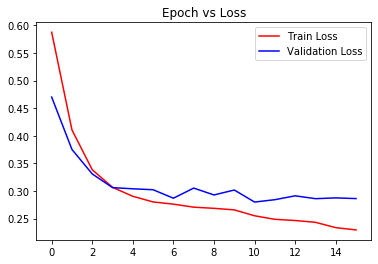

In [66]:
tr_loss, val_loss = plots('loss')

## Observation:

 - We can see minimum loss for train is 0.22934 and for validation is 0.27984.
 - Both train and validation curve is declining gradually without any sudden drop or rise.
 - Looking at both train and validation curve, we can say that model is neither overfitting nor underfitting.

## Calling 'plots' function to obtain train and validation dice co-efficient


Best train dice coefficient: 0.53113

Best validation dice coefficient: 0.47791 




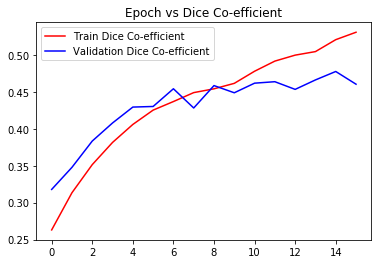

In [67]:
tr_coef, val_coef = plots('coef')

## Observation:

 - We can see best dice co-efficient for train is 0.53113 and for validation is 0.47791.
 - Both train and validation curve is increasing gradually without any sudden drop or rise.
 - Looking at both train and validation curve, we can say that model is neither overfitting nor underfitting.

## TTA Wrapper

 - __TTA Wrapper also known as Test Time Augmentation Wrapper.__
 - __TTA Wrapper is used for image segmentation and model.__
 - __Images can be customized like horizontal/vertical flip, horizontal/vertical flip, etc.__
    
    
 - Source: https://pypi.org/project/tta-wrapper/

In [68]:
!pip install tta_wrapper

In [69]:
from tta_wrapper import tta_segmentation

model = tta_segmentation(model, h_flip = True, v_flip = True, h_shift = (-15, 15), v_shift = (-15, 15), merge = 'mean')

### Function to build RLE

 - Source: https://www.kaggle.com/dimitreoliveira/cloud-images-segmentation-utillity-script

In [0]:
def build_rles(masks, reshape=None):
    
    width, height, depth = masks.shape
    rles = []
    
    for i in range(depth):
        mask = masks[:, :, i]
        
        if reshape:
            height, width = reshape

            mask = mask.astype(np.float32)
            mask = cv2.resize(mask, (width, height)).astype(np.int64)
            # mask = np_resize(mask, reshape).astype(np.int64)
        
        rle = mask2rle(mask)
        rles.append(rle)
        
    return rles

### Function to post process with probability and threshold value

 - Source: https://www.kaggle.com/dimitreoliveira/cloud-images-segmentation-utillity-script

In [0]:
def post_process(probability, threshold=0.5, min_size=10000):

    mask = cv2.threshold(probability, threshold, 1, cv2.THRESH_BINARY)[1]
    num_component, component = cv2.connectedComponents(mask.astype(np.uint8))
    predictions = np.zeros(probability.shape, np.float32)

    for c in range(1, num_component):
        p = (component == c)

        if p.sum() > min_size:
            predictions[p] = 1
            
    return predictions

## Randomly selecting best thresholds and best masks.

In [1]:
class_names = ['Fish  ', 'Flower', 'Gravel', 'Sugar ']
best_tresholds = [.27, .27, .27, .27]
best_masks = [11900, 11900, 11900, 11900]

## Predicting Test data

In [0]:
test_df = []

for i in range(0, test.shape[0], 300):

    batch_idx = list(range(i, min(test.shape[0], i + 300)))
    batch_set = test[batch_idx[0]: batch_idx[-1]+1]
    
    test_generator = DataGenerator(
                      directory = test_dest_path,
                      dataframe = batch_set,
                      target_df = submission,
                      batch_size = 1, 
                      target_size = (height, width),
                      n_channels = channels,
                      n_classes = n_class,
                      preprocessing = preprocessing,
                      seed = seed,
                      mode = 'predict',
                      shuffle=False)
    
    preds = model.predict_generator(test_generator)

    for index, a in enumerate(batch_idx):
        filename = test['image'].iloc[a]
        image_df = submission[submission['image'] == filename].copy()
        pred_masks = preds[index, ].round().astype(int)
        pred_rles = build_rles(pred_masks, reshape=(350, 525))
        image_df['EncodedPixels'] = pred_rles

        #Post procecssing
        pred_masks_post = preds[index, ].astype('float32') 
        for class_index in range(n_class):
            pred_mask = pred_masks_post[...,class_index]
            pred_mask = post_process(pred_mask, threshold = best_tresholds[class_index], min_size = best_masks[class_index])
            pred_masks_post[...,class_index] = pred_mask

        pred_rles_post = build_rles(pred_masks_post, reshape=(350, 525))
        image_df['EncodedPixels_post'] = pred_rles_post
        
        test_df.append(image_df)

sub_df = pd.concat(test_df)

In [5]:
"""
# Selecting only post columns
sub_post = sub_df[['Image_Label' ,'EncodedPixels_post']]

# Renaming columns with appropriate one as per kaggle rule
sub_post.columns = ['Image_Label' ,'EncodedPixels']

# Saving the submission
sub_post.to_csv('submission_109.csv', index=False)

# Displaying head
print("Head of dataframe:")
sub_post.head()
"""

'\n# Selecting only post columns\nsub_post = sub_df[[\'Image_Label\' ,\'EncodedPixels_post\']]\n\n# Renaming columns with appropriate one as per kaggle rule\nsub_post.columns = [\'Image_Label\' ,\'EncodedPixels\']\n\n# Saving the submission\nsub_post.to_csv(\'submission_109.csv\', index=False)\n\n# Displaying head\nprint("Head of dataframe:")\nsub_post.head()\n'

In [2]:
import pandas as pd

In [3]:
resnet_34_df = pd.read_csv('Resnet_34_0.64998.csv')

# Displaying head
print("\nHead of dataframe:")
resnet_34_df.head()


Head of dataframe:


,Image_Label,EncodedPixels
0,002f507.jpg_Fish,NaN
1,002f507.jpg_Flower,NaN
2,002f507.jpg_Gravel,1 326 334 14 350 327 684 14 700 71731 72434 34...
3,002f507.jpg_Sugar,101306 3 101656 3 101987 3 102002 8 102329 42 ...
4,0035ae9.jpg_Fish,NaN


In [7]:
import cv2
import matplotlib.pyplot as plt

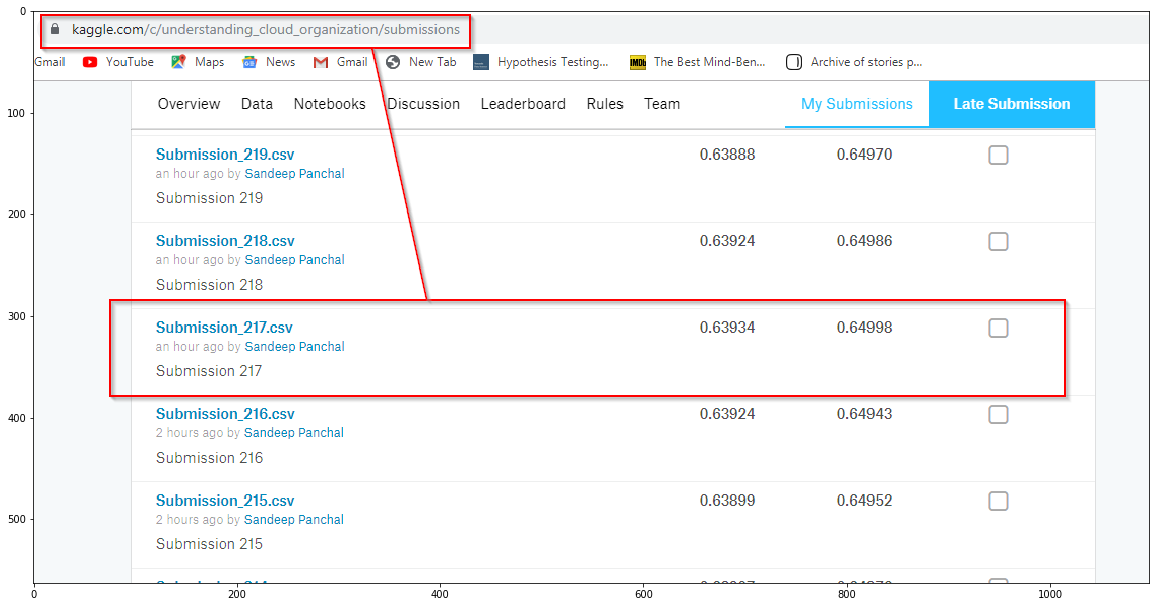

In [8]:
plt.figure(figsize = (20,20))
sc = cv2.imread('Kaggle_Score_0.64998.png')
sc = cv2.cvtColor(sc, cv2.COLOR_BGR2RGB)
plt.imshow(sc)
plt.show()

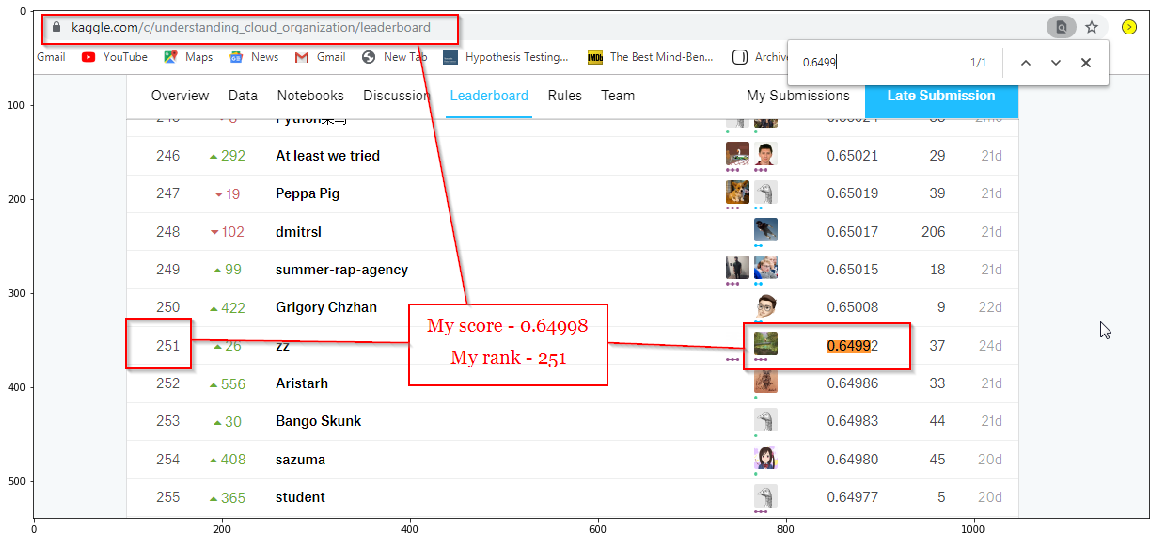

In [13]:
plt.figure(figsize = (20,20))
r = cv2.imread('Kaggle_Rank_251.png')
r = cv2.cvtColor(r, cv2.COLOR_BGR2RGB)
plt.imshow(r)
plt.show()

# Pretty Table

In [1]:
from prettytable import PrettyTable

a = PrettyTable()

a.field_names = ['S.No', 'Architecture', 'Metric', 'Optimizer', 'Private Score', 'Public Score']

a.add_row([1, 'Resnet 34', 'Dice Co-efficient', 'RAdam', 0.63934, 0.64998])
a.add_row([2, 'Resnet 50', 'Dice Co-efficient', 'RAdam', 0.63974, 0.64934])
a.add_row([3, 'Inception V3', 'Dice Co-efficient', 'RAdam', 0.63965, 0.64928])
a.add_row([4, 'Resnet 18', 'Dice Co-efficient', 'RAdam', 0.63269, 0.64252])

print('\n', a.get_string(title = "Understanding Clouds from Satellite Images"), '\n')


 +------+--------------+-------------------+-----------+---------------+--------------+
| S.No | Architecture |       Metric      | Optimizer | Private Score | Public Score |
+------+--------------+-------------------+-----------+---------------+--------------+
|  1   |  Resnet 34   | Dice Co-efficient |   RAdam   |    0.63934    |   0.64998    |
|  2   |  Resnet 50   | Dice Co-efficient |   RAdam   |    0.63974    |   0.64934    |
|  3   | Inception V3 | Dice Co-efficient |   RAdam   |    0.63965    |   0.64928    |
|  4   |  Resnet 18   | Dice Co-efficient |   RAdam   |    0.63269    |   0.64252    |
+------+--------------+-------------------+-----------+---------------+--------------+ 



# Conclusion

 - Metric - Dice Co-efficient
 - Optimizer -  RAdam
 
 
 - Models: Resnet 18, Resnet 34, Resnet 50 and Inception V3
     - Among above 4 models, Resnet 34 outperformed while Resnet 18 performed bad.
     - Resnet 34 score - 0.64970
     - Resnet 18 score - 0.64252.

# Step-by-Step Procedure

 - __Data Extraction__
    - Uploaded dataset to colab directly from kaggle using curlwget extension.
    - Extracted all the zip files to stored in drive.
    - Zip files contains train images, test images, sample_submission and train csv file.
    
    
 - __Train and Test Images__
    - Taking all the train and test images names and stored in a separate list.
    - Checked the number of images in train and test set.
    - Displayed 1st 10 images from train data.
    - Then displayed 1st 10 images from test data.
    
    
 - __Train data__
    - Imported train csv file.
    - Checked the number of columns, rows, and null values.
    - Created 2 columns which contains image id and label.
    - Checked the percentage of null values.
    - Also, graphically visualized the null values.
    - Checked the count of each label statistically.
    - With bar plot, visualized the count of each label.
    - With pie chart, visualized the count of each label.
    - Created mask columns i.e columns for each masks and respective rles.
    
    
 - __Train Test Split__
    - Splitted train data into train and validation set with 80% train and 20% validation data.
    - Created columns for train, validation and test set which contains key words which are then used to select particular data.
    
    
 - __Image Preprocessing__
    - Defined functions which are used to pre-process images such has size, color, etc.
    - Called functions to pre-process all the images and then stored in a specified path.
    
    
 - __Training Model__
 
    - Image DataGenerator
        - Defined functions to customize image datagenerator.
        - Returns the customized images.
        - Returns images in batch wise.
        - Returns mask images.        
        
    - Segmentation Model
        - Segmentation model is used for image segmentation.
        - We will use 'resnet18' as backbone for image segmentation.        
        
    - Train Generator
        - Calling DataGenerator function to create train datagenerator.
        - It preprocess the images with size, color, channels, classes and batch wise.        
        
    - Validation Generator
        - Calling DataGenerator function to create validation datagenerator.
        - It preprocess the images with size, color, channels, classes and batch wise.        
        
    - Callback
        - Creating callback such ModelCheckpoint, EarlyStopping, and ReduceLROnPlateau.
        - ModelCheckpoint is to save the best model which further can be used in future.
        - EarlyStopping is to stop running the model if there is no improvement in score.        
        
    - Optimizer
        - Creating customized optimizer 'RAdam' with learning rate 3e-4.        
        
    - Metric - Dice Co-efficient
        - Defining dice co-efficient metric.        
        
    - Compile
        - Compiling model
            - Optimizer: RAdam
            - Loss - binary_crossentropy
            - Metric - Dice Co-efficient            
          
    - Function - rle2mask
        - Defining function 'rle2mask' which converts rle to mask.        
        
    - Function - mask2rle
        - Defining function 'mask2rle' which converts mask to rle.        
        
    - Function - build_masks
        - Defining function 'build_masks' which builds masks.        
        
    - Fit_Generator
        - Fitting the model with fit_generator with train and validation data.
        - Defined parameters such as callbacks, batch size, steps per epoch, epochs, etc.        
     
    - Model Save
        - Model is saved in json and hdf5 format.
        - This model can be used anytime in future.        
       
    - Plots
        - Plotted train and validation loss.
        - Then obtained best train and validation loss
        - Plotted train and validation dice co-efficient.
        - Then obtained best train and validation dice co-efficient.
        
       
 - __Prediction of Test Set__
     - Randomly defining best thresholds and best masks values.
     - Calling datagenerator function to generate test data.
     - Predicted test set with randomly pre-defined best threshold and best mask values.
     
        
 - __Submission__
     - Submission file is imported which contains image ids.
     - Predicted values are assigned corresponding to image ids.
     - Submitted the prediction in kaggle.
     
     
 - __Conclusion__
     - Models: Resnet 18, Resnet 34, Resnet 50 and Inception V3
         - Among above 4 models, Resnet 34 outperformed while Resnet 18 performed bad.
         - Resnet 34 score - 0.64998
         - Resnet 18 score - 0.64252.
     
    
 - __Resnet 34 Scores__:
     - Private Score: 0.63934
     - Public Score: 0.64998
  
    